In [31]:
import yfinance as yf
import pandas as pd
import numpy as np
from preprocess import prep_all_macd, prep_macd_mod, prep_movavg_mod
from tradesim_macd import simulate as sim_alt
from tradesim_macd_daily import simulate
from tradesim_sma_daily import sim_buy_hold_eq
import matplotlib.pyplot as plt

In [27]:
df_xlvtick = pd.read_csv('XLV.csv')
tick_list = df_xlvtick['Ticker'].tolist()
df_dict = prep_macd_mod(tick_list)
start = pd.to_datetime('12/22/98')
end = pd.to_datetime('01/06/21')
funds = 1000000
df_dict2 = prep_movavg_mod(tick_list)

In [6]:
macd_funds, macd_current_val, macd_fund_df = simulate(funds, df_dict, start, end)

In [7]:
macd_fund_df

5179900.301859014

In [32]:
funds, current_val, fund_df = sim_buy_hold_eq(funds, df_dict2, start, end)

In [34]:
current_val

29654033.10477054

## Performance of Alternate MACD strategies (monthly, 2-month, 6-month)

In [18]:
# monthly adjustment strategy
funds = 1000000
days = 21
cycle = 264
df_list = prep_all_macd(tick_list)

In [19]:
macd_1_fund_df, macd_1_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [20]:
# bimonthly adjustment strategy
funds = 1000000
days = 42
cycle = 132

In [21]:
macd_2_fund_df, macd_2_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [22]:
macd_2_fund_df

,date,curr_fund,num_stocks
0,1999-02-24,9.664783e+05,17
1,1999-04-26,1.054894e+06,24
2,1999-06-24,1.064928e+06,36
3,1999-08-24,1.215766e+06,19
4,1999-10-22,1.076110e+06,35
...,...,...,...
127,2020-05-06,3.030464e+07,12
128,2020-07-07,3.273204e+07,25
129,2020-09-03,3.452722e+07,43
130,2020-11-03,3.421610e+07,28


In [23]:
# biannual adjustment strategy
funds = 1000000
days = 126
cycle = 44

In [24]:
macd_6_fund_df, macd_6_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [44]:
#annual adjustment strategy
funds = 1000000
days = 252
cycle = 22

In [45]:
macd_12_fund_df, macd_12_final_funds = sim_alt(funds, df_list, start, days, cycle)

In [46]:
macd_12_fund_df

,date,curr_fund,num_stocks
0,1999-12-22,1.188203e+06,17
1,2000-12-20,2.491522e+06,17
2,2001-12-27,2.776938e+06,27
3,2002-12-27,2.185685e+06,29
4,2003-12-29,3.016503e+06,22
5,2004-12-29,3.621729e+06,29
6,2005-12-28,4.181550e+06,22
7,2006-12-28,5.011447e+06,24
8,2007-12-31,5.724173e+06,24
9,2008-12-30,3.955921e+06,27


## Period return graph

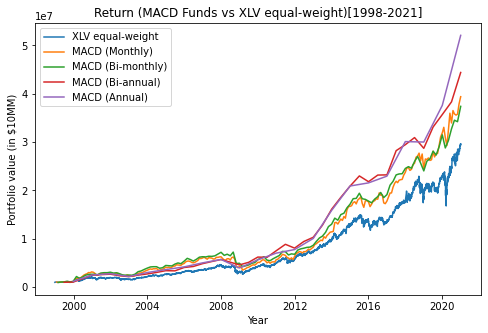

In [47]:
# full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_ylabel('Portfolio value (in $10MM)')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(macd_1_fund_df['date'], macd_1_fund_df['curr_fund'], label='MACD (Monthly)')
ax.plot(macd_2_fund_df['date'], macd_2_fund_df['curr_fund'], label='MACD (Bi-monthly)')
ax.plot(macd_6_fund_df['date'], macd_6_fund_df['curr_fund'], label='MACD (Bi-annual)')
ax.plot(macd_12_fund_df['date'], macd_12_fund_df['curr_fund'], label='MACD (Annual)')
ax.legend()
ax.set_title('Return (MACD Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('MACD_all_22_Year_Return.png')

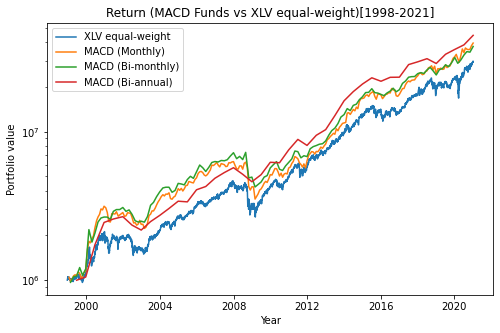

In [35]:
# log scale full period plot (fund vs xlv)
fig, ax = plt.subplots(figsize=(8,5))
ax.set_yscale('log')
ax.set_ylabel('Portfolio value')
ax.set_xlabel('Year')
ax.plot(fund_df['date'], fund_df['curr_fund'], label='XLV equal-weight')
ax.plot(macd_1_fund_df['date'], macd_1_fund_df['curr_fund'], label='MACD (Monthly)')
ax.plot(macd_2_fund_df['date'], macd_2_fund_df['curr_fund'], label='MACD (Bi-monthly)')
ax.plot(macd_6_fund_df['date'], macd_6_fund_df['curr_fund'], label='MACD (Bi-annual)')
ax.legend()
ax.set_title('Return (MACD Funds vs XLV equal-weight)[1998-2021]')
plt.savefig('MACD_log_22_Year_Return.png')

### Sharpe Ratios for MACD strategies

In [50]:
macd_df_pct = macd_fund_df.iloc[::252,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

In [51]:
#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
macd_df_pct = macd_df_pct - risk_free

In [52]:
mean = macd_df_pct.mean()
stdev = macd_df_pct.std()

mean,stdev

(curr_fund    0.062101
 dtype: float64,
 curr_fund    0.101102
 dtype: float64)

In [53]:
macd_sharpe = mean / stdev
macd_sharpe

curr_fund    0.614239
dtype: float64

In [37]:
#1month
macd_1_df_pct = macd_1_fund_df.iloc[::12,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
macd_1_df_pct = macd_1_df_pct - risk_free

mean = macd_1_df_pct.mean()
stdev = macd_1_df_pct.std()

mean,stdev

(curr_fund    0.186826
 dtype: float64,
 curr_fund    0.267806
 dtype: float64)

In [38]:
macd_1_sharpe = mean / stdev
macd_1_sharpe

curr_fund    0.697618
dtype: float64

In [39]:
#2month
macd_2_df_pct = macd_2_fund_df.iloc[::6,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
macd_2_df_pct = macd_2_df_pct - risk_free

mean = macd_2_df_pct.mean()
stdev = macd_2_df_pct.std()

mean,stdev

(curr_fund    0.193063
 dtype: float64,
 curr_fund    0.328789
 dtype: float64)

In [40]:
macd_2_sharpe = mean / stdev
macd_2_sharpe

curr_fund    0.587194
dtype: float64

In [41]:
#6month
macd_6_df_pct = macd_6_fund_df.iloc[::2,:].set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
macd_6_df_pct = macd_6_df_pct - risk_free

mean = macd_6_df_pct.mean()
stdev = macd_6_df_pct.std()

mean,stdev

(curr_fund    0.185203
 dtype: float64,
 curr_fund    0.201309
 dtype: float64)

In [42]:
macd_6_sharpe = mean / stdev
macd_6_sharpe

curr_fund    0.919992
dtype: float64

In [48]:
#12month
macd_12_df_pct = macd_12_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()

#average risk-free rate of 1 year Tbill over 22 years
risk_free = 0.0195
macd_12_df_pct = macd_12_df_pct - risk_free

mean = macd_12_df_pct.mean()
stdev = macd_12_df_pct.std()

mean,stdev

(curr_fund    0.207895
 dtype: float64,
 curr_fund    0.285414
 dtype: float64)

In [49]:
macd_12_sharpe = mean / stdev
macd_12_sharpe

curr_fund    0.728398
dtype: float64

## Relationship between number of stocks in portfolio and return

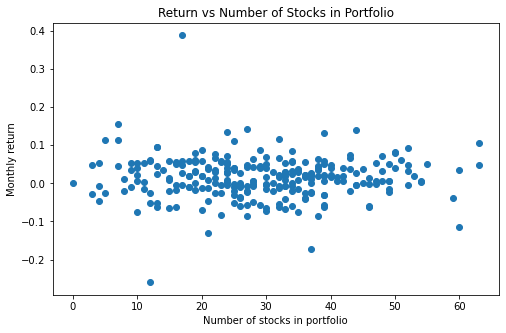

In [43]:
fig, ax = plt.subplots(figsize=(8,5))
macd_1_pct_monthly = macd_1_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Monthly return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(macd_1_fund_df.iloc[1:]['num_stocks'], macd_1_pct_monthly['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_1_Return_vs_num_stock.png')

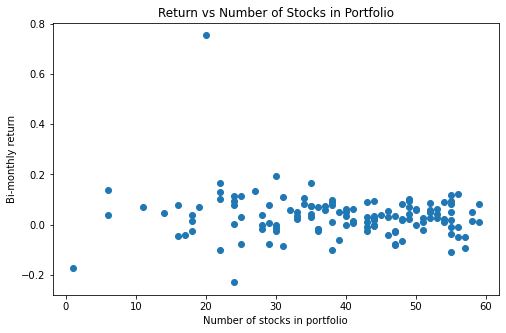

In [60]:
fig, ax = plt.subplots(figsize=(8,5))
sma_2_pct_bimonthly = sma_2_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Bi-monthly return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(sma_2_fund_df.iloc[1:]['num_stocks'], sma_2_pct_bimonthly['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_2_Return_vs_num_stock.png')

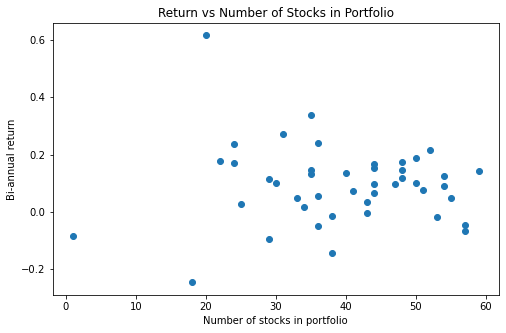

In [61]:
fig, ax = plt.subplots(figsize=(8,5))
sma_6_pct_biannual = sma_6_fund_df.set_index('date')['curr_fund'].pct_change().to_frame().dropna()
ax.set_ylabel('Bi-annual return')
ax.set_xlabel('Number of stocks in portfolio')
ax.scatter(sma_6_fund_df.iloc[1:]['num_stocks'], sma_6_pct_biannual['curr_fund'])
ax.set_title('Return vs Number of Stocks in Portfolio')
plt.savefig('SMA_6_Return_vs_num_stock.png')